In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

Read the dataset

In [2]:
dataset = pd.read_csv('C:\\Users\\USER\\Desktop\\FCUP - Doutoramento\\PHD_Thesis_Git_Code\\WTCCC\\table_study_cases_control_with_scores_and_new_controls.csv')

In [3]:
copy = dataset
copy['cohort'] = copy['cohort'].map({'case': 1 ,'control': 0})
dummy_dataset = copy.drop(columns=['patient', 'Age', 'Region', 'Gender'])
dummy_dataset = pd.get_dummies(dummy_dataset)

In [4]:
dummy_dataset_case = dummy_dataset[(dummy_dataset['cohort'] == 0)]
dummy_dataset_control = dummy_dataset[dummy_dataset['cohort'] == 1]

Load Pearson correlation matrix

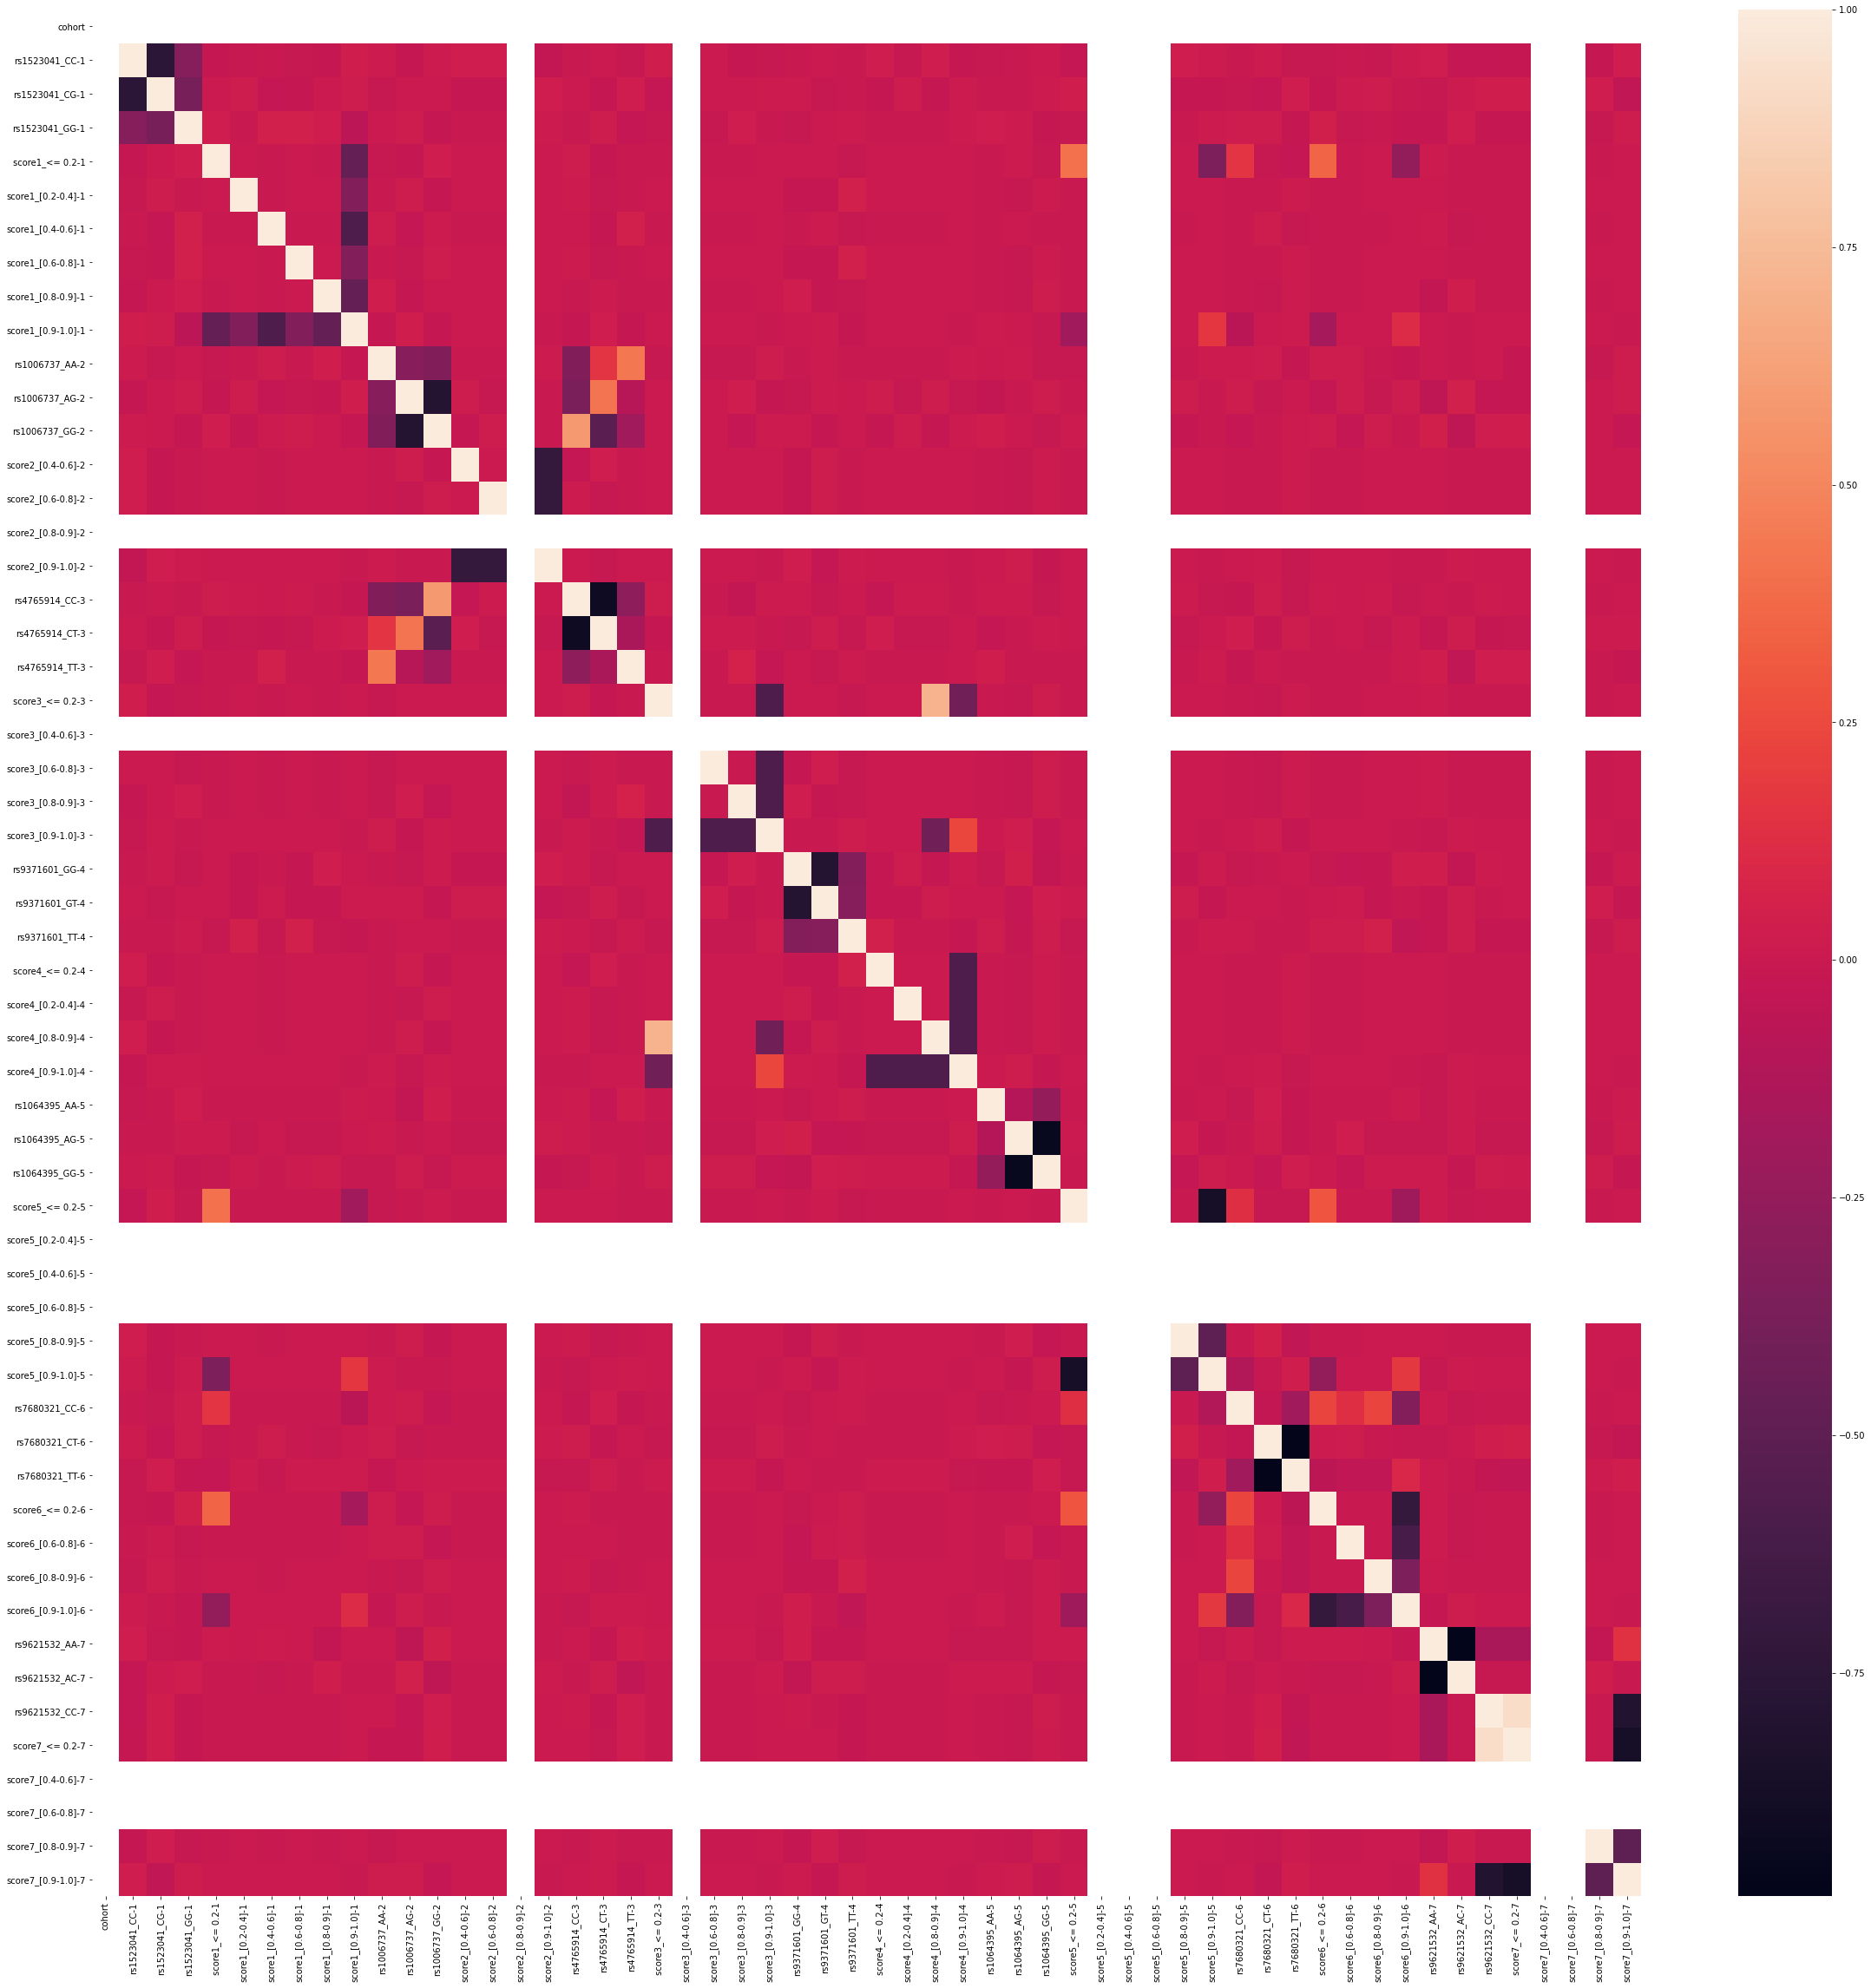

In [5]:
corrMatrix_case = dummy_dataset_case.corr()
plt.figure(figsize=(40,40))

sn.heatmap(corrMatrix_case)
plt.savefig('correlation_matrix_positives_case.png', facecolor='white', transparent=False)
plt.show()

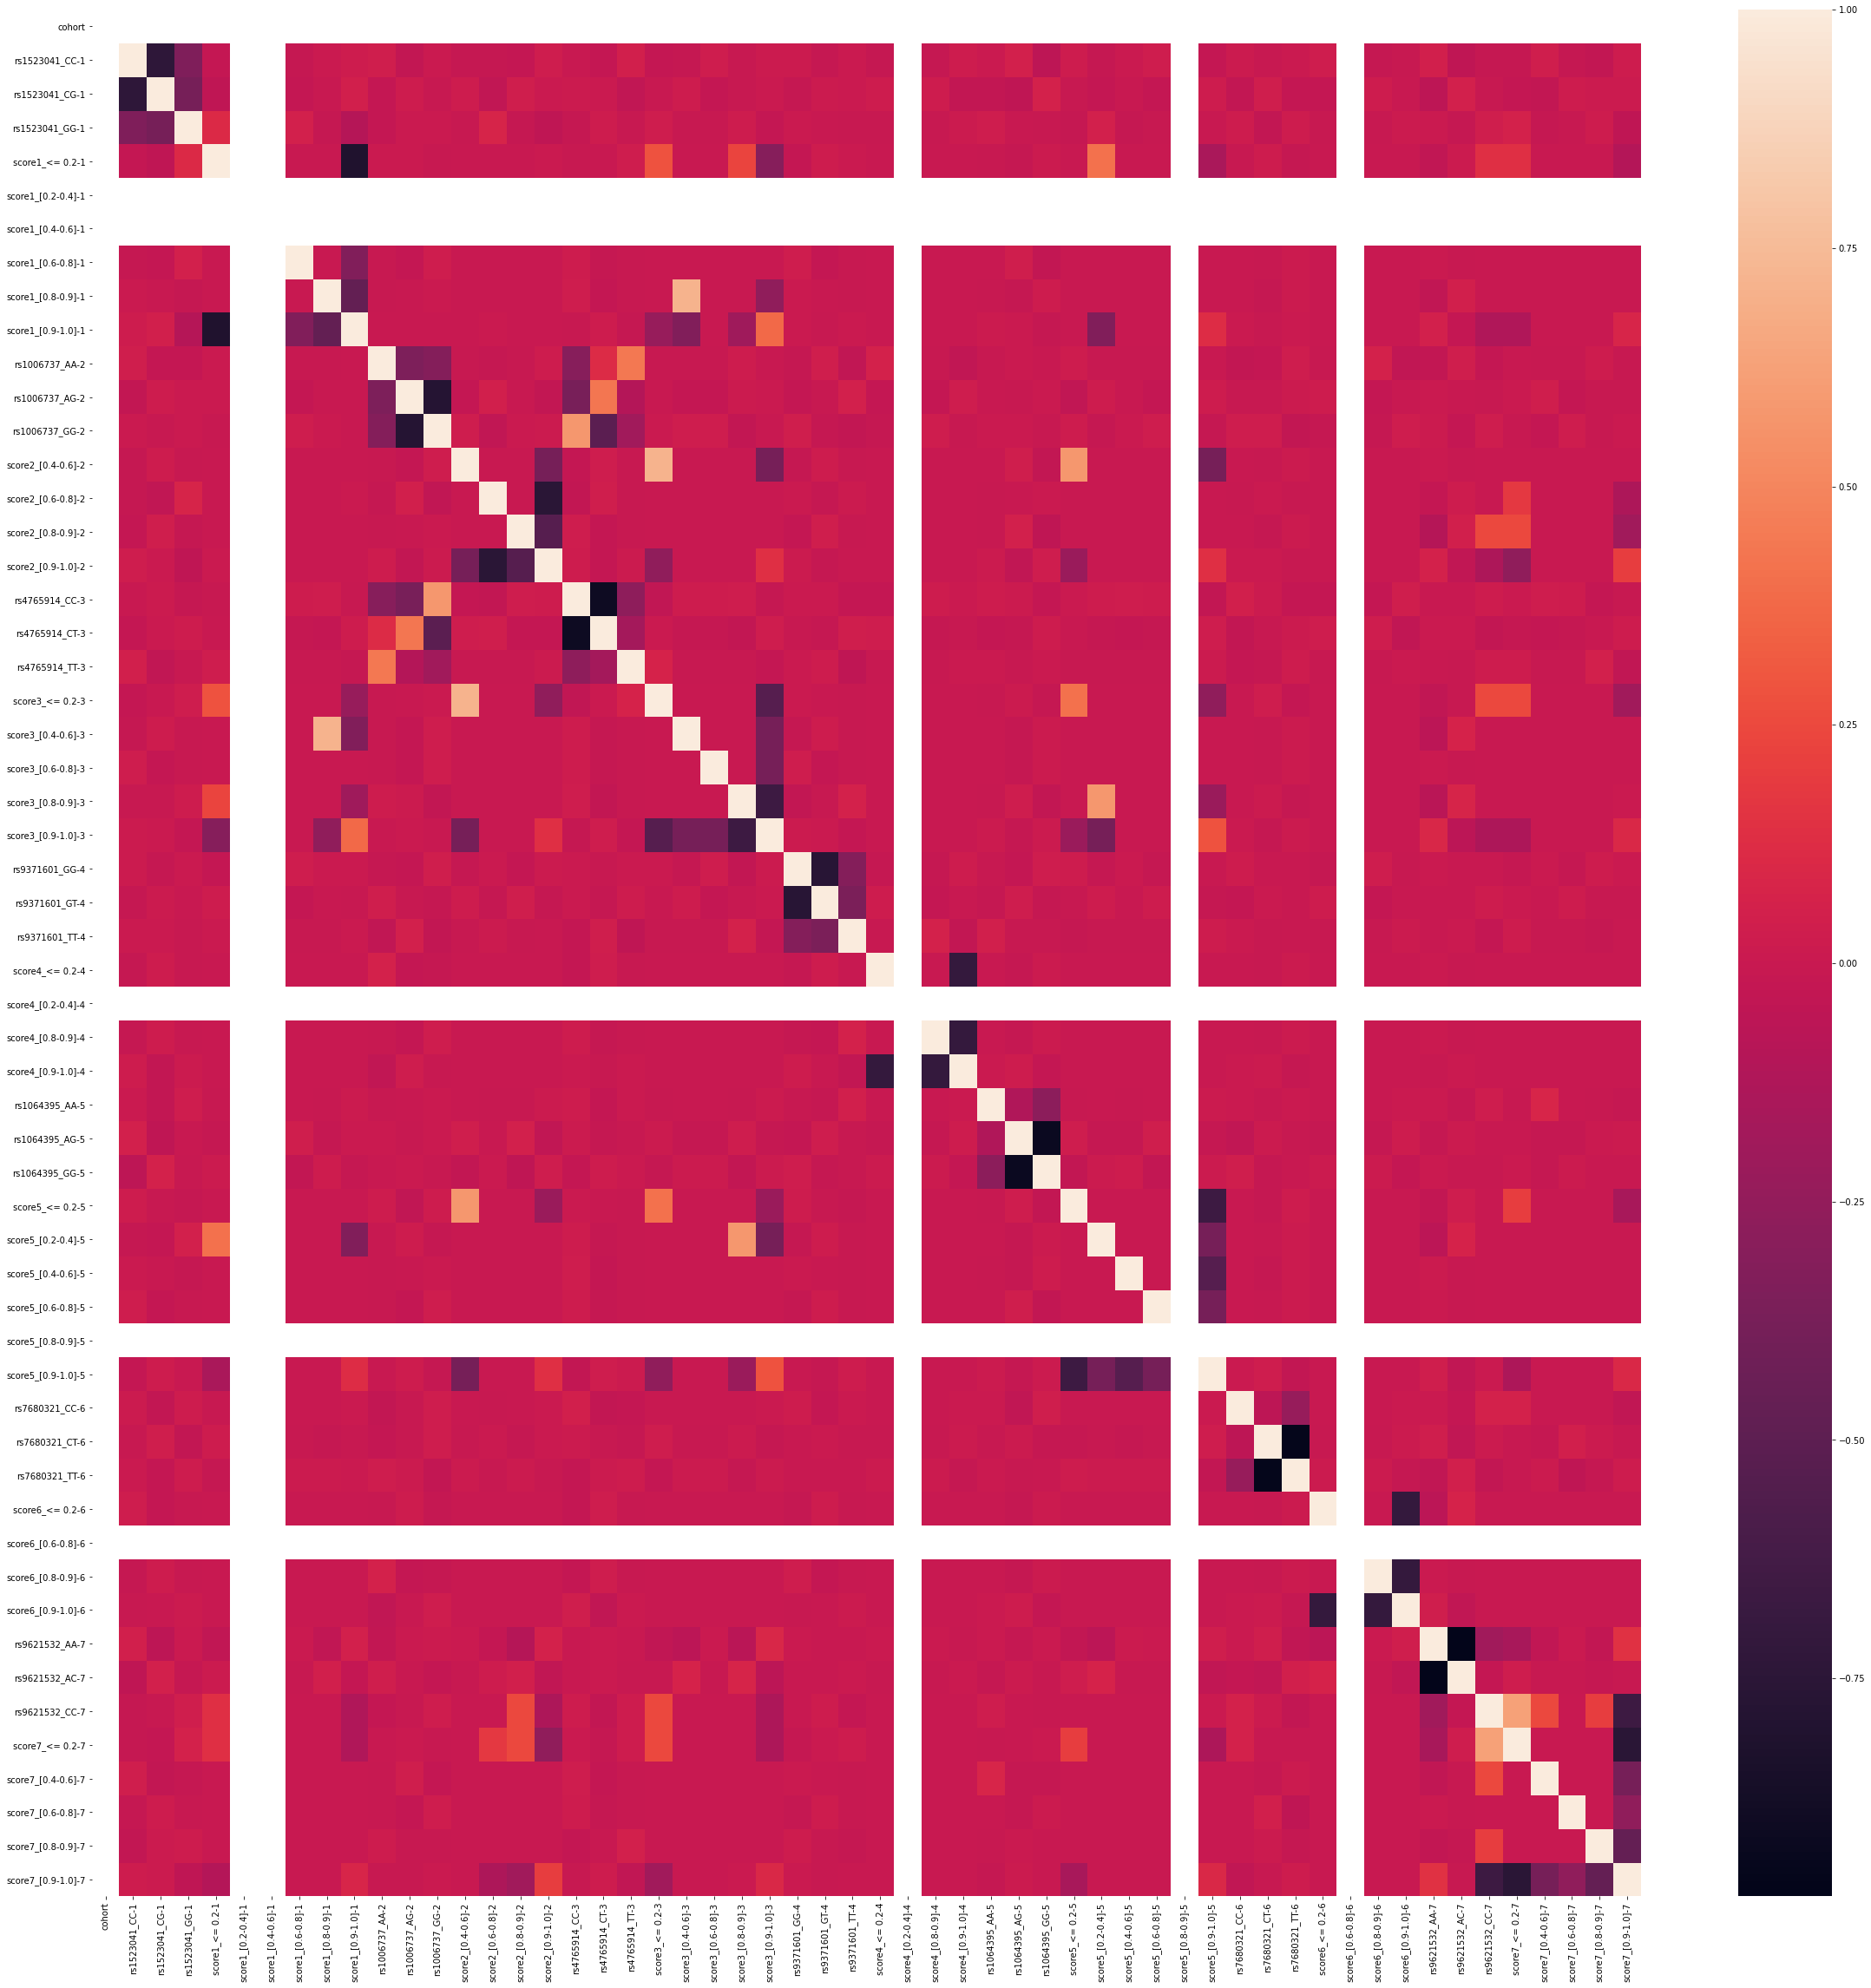

In [6]:
corrMatrix_control = dummy_dataset_control.corr()
plt.figure(figsize=(40,40))


sn.heatmap(corrMatrix_control)
plt.savefig('correlation_matrix_control.png', facecolor='white', transparent=False)
plt.show()

In [7]:
tuples_cases = []
test_sad_case = []
cohort_cases_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_case.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_cases.append([(x,y) for x,y in zip(corrMatrix_case.iloc[0].index, corrMatrix_case.iloc[i])])

for a_tuple in tuples_cases:
    for i in range(0, len(tuples_cases)):
        cohort_cases_tuples.append(a_tuple[i])

for a_tuple in cohort_cases_tuples:
    test_sad_case.append(a_tuple[1])

print(test_sad_case)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976916, -0.3111908019799921, -0.02031750847582518, -0.014364254177178536, -0.0031940933174454253, -0.01436425417717855, -0.020317508475825148, 0.030612835131793543, 0.008742903038393573, -0.016112882383987146, 0.010356431737021473, 0.02319802024781273, 0.023198020247812794, nan, -0.032812422224895436, -0.0011620267045974067, 0.0067536118936855636, -0.013044006801911317, 0.03281242222489519, nan, 0.006247456874535042, -0.02031750847582516, -0.010828133888573335, -0.004608918049135366, 0.007085355995913013, -0.0038505523215952033, 0.023198020247812635, -0.014364254177178546, 0.023198020247812614, -0.01849972600149403, -0.010160659220186979, -0.0011636007896767835, 0.0045896056140992516, -0

In [8]:
tuples_controls = []
test_sad_controls = []
cohort_controls_tuples = []
rs1523041_CC1_tuples =[]
for i in range(0,len(corrMatrix_control.columns)):
    #tuples = [(x,y) for x,y in zip(corrMatrix.iloc[0].index, corrMatrix.iloc[i])]
    tuples_controls.append([(x,y) for x,y in zip(corrMatrix_control.iloc[0].index, corrMatrix_control.iloc[i])])

for a_tuple in tuples_controls:
    for i in range(0, len(tuples_controls)):
        cohort_controls_tuples.append(a_tuple[i])

for a_tuple in cohort_controls_tuples:
    test_sad_controls.append(a_tuple[1])

print(test_sad_case)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, -0.7595823291976916, -0.3111908019799921, -0.02031750847582518, -0.014364254177178536, -0.0031940933174454253, -0.01436425417717855, -0.020317508475825148, 0.030612835131793543, 0.008742903038393573, -0.016112882383987146, 0.010356431737021473, 0.02319802024781273, 0.023198020247812794, nan, -0.032812422224895436, -0.0011620267045974067, 0.0067536118936855636, -0.013044006801911317, 0.03281242222489519, nan, 0.006247456874535042, -0.02031750847582516, -0.010828133888573335, -0.004608918049135366, 0.007085355995913013, -0.0038505523215952033, 0.023198020247812635, -0.014364254177178546, 0.023198020247812614, -0.01849972600149403, -0.010160659220186979, -0.0011636007896767835, 0.0045896056140992516, -0

In [9]:
tuples_v2_case = []
for col in corrMatrix_case.columns:
    for i in range(0, len(corrMatrix_case.iloc[0].index)):
        tuples_v2_case.append((corrMatrix_case.iloc[0].index[i],col ))

tuples_v2_control = []
for col in corrMatrix_control.columns:
    for i in range(0, len(corrMatrix_control.iloc[0].index)):
        tuples_v2_control.append((corrMatrix_control.iloc[0].index[i],col ))

In [10]:
df_case = pd.DataFrame(index=range(len(tuples_v2_case)), columns=['correlation'])

df_case.index = tuples_v2_case
df_case['correlation'] = test_sad_case


cases_study = df_case.dropna()
cases_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.759582
"(rs1523041_GG-1, rs1523041_CC-1)",-0.311191
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.020318
"(score1_[0.2-0.4]-1, rs1523041_CC-1)",-0.014364
...,...
"(rs9621532_AC-7, score7_[0.9-1.0]-7)",-0.007129
"(rs9621532_CC-7, score7_[0.9-1.0]-7)",-0.801293
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.865736
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.499500


In [11]:
df_control = pd.DataFrame(index=range(len(tuples_v2_control)), columns=['correlation'])

df_control.index = tuples_v2_control
df_control['correlation'] = test_sad_controls


control_study = df_control.dropna()
control_study

,correlation
"(rs1523041_CC-1, rs1523041_CC-1)",1.000000
"(rs1523041_CG-1, rs1523041_CC-1)",-0.738118
"(rs1523041_GG-1, rs1523041_CC-1)",-0.340272
"(score1_<= 0.2-1, rs1523041_CC-1)",-0.025725
"(score1_[0.6-0.8]-1, rs1523041_CC-1)",-0.018115
...,...
"(score7_<= 0.2-7, score7_[0.9-1.0]-7)",-0.754788
"(score7_[0.4-0.6]-7, score7_[0.9-1.0]-7)",-0.376827
"(score7_[0.6-0.8]-7, score7_[0.9-1.0]-7)",-0.266390
"(score7_[0.8-0.9]-7, score7_[0.9-1.0]-7)",-0.461632


In [12]:
cases_study[(cases_study['correlation'] > 0.5) & (cases_study['correlation'] < 1.0)]

,correlation
"(rs4765914_CC-3, rs1006737_GG-2)",0.581769
"(rs1006737_GG-2, rs4765914_CC-3)",0.581769
"(score4_[0.8-0.9]-4, score3_<= 0.2-3)",0.706989
"(score3_<= 0.2-3, score4_[0.8-0.9]-4)",0.706989
"(score7_<= 0.2-7, rs9621532_CC-7)",0.925666
"(rs9621532_CC-7, score7_<= 0.2-7)",0.925666


In [13]:
control = control_study[(control_study['correlation'] > 0.5) & (control_study['correlation'] < 1.0)]

control['correlation'].sort_values()

(score5_<= 0.2-5, score2_[0.4-0.6]-2)       0.577061
(score5_[0.2-0.4]-5, score3_[0.8-0.9]-3)    0.577061
(score2_[0.4-0.6]-2, score5_<= 0.2-5)       0.577061
(score3_[0.8-0.9]-3, score5_[0.2-0.4]-5)    0.577061
(rs4765914_CC-3, rs1006737_GG-2)            0.581903
(rs1006737_GG-2, rs4765914_CC-3)            0.581903
(score7_<= 0.2-7, rs9621532_CC-7)           0.623492
(rs9621532_CC-7, score7_<= 0.2-7)           0.623492
(score3_[0.4-0.6]-3, score1_[0.8-0.9]-1)    0.706930
(score3_<= 0.2-3, score2_[0.4-0.6]-2)       0.706930
(score2_[0.4-0.6]-2, score3_<= 0.2-3)       0.706930
(score1_[0.8-0.9]-1, score3_[0.4-0.6]-3)    0.706930
Name: correlation, dtype: float64

In [14]:
cases_neg = cases_study[(cases_study['correlation'] < -0.5) & (cases_study['correlation'] > -1.0)]
cases_neg['correlation'].sort_values()

(rs9621532_AA-7, rs9621532_AC-7)           -0.985495
(rs9621532_AC-7, rs9621532_AA-7)           -0.985495
(rs7680321_CT-6, rs7680321_TT-6)           -0.975623
(rs7680321_TT-6, rs7680321_CT-6)           -0.975623
(rs1064395_AG-5, rs1064395_GG-5)           -0.940934
(rs1064395_GG-5, rs1064395_AG-5)           -0.940934
(rs4765914_CT-3, rs4765914_CC-3)           -0.912130
(rs4765914_CC-3, rs4765914_CT-3)           -0.912130
(score5_<= 0.2-5, score5_[0.9-1.0]-5)      -0.865881
(score5_[0.9-1.0]-5, score5_<= 0.2-5)      -0.865881
(score7_<= 0.2-7, score7_[0.9-1.0]-7)      -0.865736
(score7_[0.9-1.0]-7, score7_<= 0.2-7)      -0.865736
(score7_[0.9-1.0]-7, rs9621532_CC-7)       -0.801293
(rs9621532_CC-7, score7_[0.9-1.0]-7)       -0.801293
(rs9371601_GT-4, rs9371601_GG-4)           -0.795436
(rs9371601_GG-4, rs9371601_GT-4)           -0.795436
(rs1006737_GG-2, rs1006737_AG-2)           -0.793477
(rs1006737_AG-2, rs1006737_GG-2)           -0.793477
(rs1523041_CG-1, rs1523041_CC-1)           -0.

In [15]:
control_neg = control_study[(control_study['correlation'] < -0.5) & (control_study['correlation'] > -1.0)]

control_neg['correlation'].sort_values()

(rs9621532_AC-7, rs9621532_AA-7)           -0.978581
(rs9621532_AA-7, rs9621532_AC-7)           -0.978581
(rs7680321_TT-6, rs7680321_CT-6)           -0.957782
(rs7680321_CT-6, rs7680321_TT-6)           -0.957782
(rs1064395_GG-5, rs1064395_AG-5)           -0.922343
(rs1064395_AG-5, rs1064395_GG-5)           -0.922343
(rs4765914_CC-3, rs4765914_CT-3)           -0.903457
(rs4765914_CT-3, rs4765914_CC-3)           -0.903457
(score1_[0.9-1.0]-1, score1_<= 0.2-1)      -0.815882
(score1_<= 0.2-1, score1_[0.9-1.0]-1)      -0.815882
(rs1006737_GG-2, rs1006737_AG-2)           -0.778701
(rs1006737_AG-2, rs1006737_GG-2)           -0.778701
(rs9371601_GT-4, rs9371601_GG-4)           -0.769756
(rs9371601_GG-4, rs9371601_GT-4)           -0.769756
(score2_[0.9-1.0]-2, score2_[0.6-0.8]-2)   -0.755360
(score2_[0.6-0.8]-2, score2_[0.9-1.0]-2)   -0.755360
(score7_[0.9-1.0]-7, score7_<= 0.2-7)      -0.754788
(score7_<= 0.2-7, score7_[0.9-1.0]-7)      -0.754788
(rs1523041_CG-1, rs1523041_CC-1)           -0.